# **Understanding The Impact of the learning rate**

## In order to understand how learning rate impacts the training of a model, let's consider a very simple case, where we try to fit the following equation (note that the following equation is different from the toy dataset that we have been working on so far):



*   y = 3*x
*  
Note that y is the output and x is the input. With a set of input and expected output values, we will try and fit the equation with varying learning rates to understand the impact of the learning rate.






# **We specify the input and output dataset as follows:**

In [1]:
x = [[1],[2],[3],[4]]
y = [[3],[6],[9],[12]]

Define the feed_forward function. Further, in this instance, we will modify the network in such a way that we do not have a hidden layer and the architecture is as follows:


*   y = w*x+b
*   Note that, in the preceding function, we are estimating the parameters w and b:






In [2]:
from copy import deepcopy
import numpy as np

def feed_forward(inputs,outputs,weights):
    out = np.dot(inputs,weights[0])+ weights[1]
    mean_squared_error = np.mean(np.square(out-outputs))
    return mean_squared_error

# **Define the update_weights function just like we defined it in the Gradient descent in code section:**

In [3]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            # we calculate the gradient (change in loss value) due to the weight change...
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights

# **Initialize weight and bias values to a random value:**

In [4]:
W = [np.array([[0]],dtype=np.float32),np.array([[0]],dtype=np.float32)]

Note that the weight and bias values are randomly initialized to values of 0. Further, the shape of the input weight value is 1 x 1, as the shape of each data point in the input is 1 x 1 and the shape of the bias value is  1 x 1 (as there is only one node in the output and each output has one value).

# **Let's leverage the update_weights function with a learning rate of 0.01, loop through 1,000 iterations, and check how the weight value (W) varies over increasing epochs:**

In [5]:
weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,0.01)
    weight_value.append(W[0][0][0])

Note that, in the preceding code, we are using a learning rate of 0.01 and repeating the update_weights function to fetch the modified weight at the end of each epoch. Further, in each epoch, we gave the most recent updated weight as an input to fetch the updated weight in the next epoch.

# **Plot the value of the weight parameter at the end of each epoch:**

Text(0, 0.5, 'Weight value')

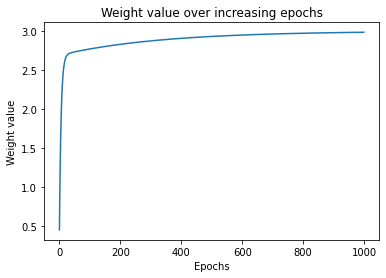

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

# **In order to understand the impact of the value of the learning rate on arriving at the optimal weight values, let's understand how weight value varies over increasing epochs when the learning rate is 0.1 and when the learning rate is 1.**

Text(0, 0.5, 'Weight value')

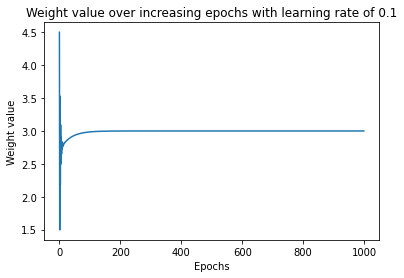

In [7]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,0.1)
    weight_value.append(W[0][0][0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs with learning rate of 0.1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

Text(0, 0.5, 'Weight value')

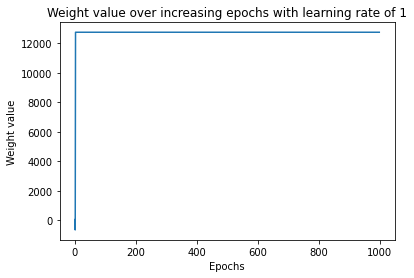

In [8]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,1)
    weight_value.append(W[0][0][0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs with learning rate of 1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

# **In order to have a deeper understanding of the interplay between the gradient value, learning rate, and weight value, let's run the update_weights function only for 10 epochs. Further, we will print the following values to understand how they vary over increasing epochs:**



*   Weight value at the start of each epoch
*   Loss prior to weight update
*   Loss when the weight is updated by a small amount
*   Gradient value







# **We modify the update_weights function to print the preceding values as follows:**

In [19]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
            if(i % 2 == 0):
                print('weight value:', np.round(original_weights[i][index],2), 
                      'original loss:', np.round(org_loss,2), 
                      'loss_plus:', np.round(_loss_plus,2), 
                      'gradient:', np.round(grad,2), 
                      'updated_weights:', np.round(updated_weights[i][index],2))
    return updated_weights


# **Apply 10 epochs and learning rate 0.01**

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 0.45
weight value: 0.45 original loss: 46.88 loss_plus: 46.88 gradient: -37.49 updated_weights: 0.82
weight value: 0.82 original loss: 32.57 loss_plus: 32.57 gradient: -31.26 updated_weights: 1.14
weight value: 1.14 original loss: 22.64 loss_plus: 22.64 gradient: -26.05 updated_weights: 1.4
weight value: 1.4 original loss: 15.75 loss_plus: 15.75 gradient: -21.72 updated_weights: 1.62
weight value: 1.62 original loss: 10.97 loss_plus: 10.97 gradient: -18.1 updated_weights: 1.8
weight value: 1.8 original loss: 7.65 loss_plus: 7.65 gradient: -15.09 updated_weights: 1.95
weight value: 1.95 original loss: 5.35 loss_plus: 5.35 gradient: -12.59 updated_weights: 2.07
weight value: 2.07 original loss: 3.75 loss_plus: 3.75 gradient: -10.49 updated_weights: 2.18
weight value: 2.18 original loss: 2.64 loss_plus: 2.64 gradient: -8.75 updated_weights: 2.27
[array([[2.265477]], dtype=float32), array([[0.7404298]], 

Text(0, 0.5, 'Weight value')

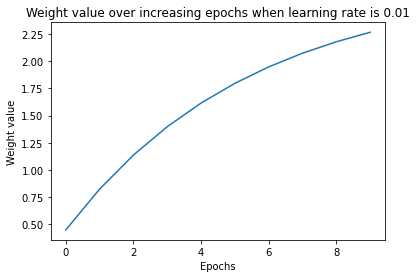

In [20]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,0.01)
    weight_value.append(W[0][0][0])
print(W)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value[:100])
plt.title('Weight value over increasing epochs when learning rate is 0.01')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

# **Apply 10 epochs and learning rate 0.1**

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 4.5
weight value: 4.5 original loss: 30.37 loss_plus: 30.38 gradient: 30.04 updated_weights: 1.5
weight value: 1.5 original loss: 13.79 loss_plus: 13.78 gradient: -20.31 updated_weights: 3.53
weight value: 3.53 original loss: 6.25 loss_plus: 6.26 gradient: 13.46 updated_weights: 2.18
weight value: 2.18 original loss: 2.85 loss_plus: 2.85 gradient: -9.14 updated_weights: 3.1
weight value: 3.1 original loss: 1.33 loss_plus: 1.33 gradient: 5.97 updated_weights: 2.5
weight value: 2.5 original loss: 0.65 loss_plus: 0.65 gradient: -4.12 updated_weights: 2.91
weight value: 2.91 original loss: 0.34 loss_plus: 0.34 gradient: 2.63 updated_weights: 2.65
weight value: 2.65 original loss: 0.2 loss_plus: 0.2 gradient: -1.88 updated_weights: 2.84
weight value: 2.84 original loss: 0.13 loss_plus: 0.13 gradient: 1.14 updated_weights: 2.72
[array([[2.7217765]], dtype=float32), array([[0.6589097]], dtype=float32)]


Text(0, 0.5, 'Weight value')

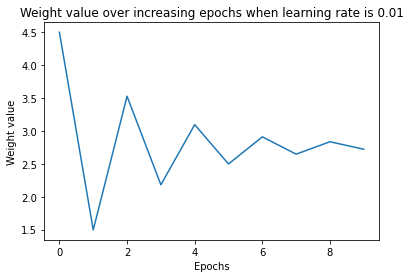

In [22]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,0.1)
    weight_value.append(W[0][0][0])
print(W)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value[:100])
plt.title('Weight value over increasing epochs when learning rate is 0.01')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

# **Apply 10 epochs and learning rate 1**

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 45.0
weight value: 45.0 original loss: 16604.45 loss_plus: 16604.52 gradient: 699.22 updated_weights: -654.22
weight value: -654.22 original loss: 4030779.1 loss_plus: 4030777.76 gradient: -13409.38 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weig

Text(0, 0.5, 'Weight value')

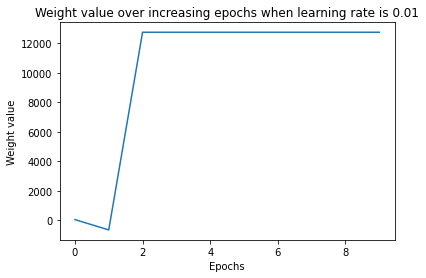

In [24]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,1)
    weight_value.append(W[0][0][0])
print(W)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value[:100])
plt.title('Weight value over increasing epochs when learning rate is 0.01')
plt.xlabel('Epochs')
plt.ylabel('Weight value')